In [1]:
import pandas as pd
import numpy as np

temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)
temp_df = temp_df.sort_values(by=['time'])
temp = pd.DataFrame(pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h'), columns=['time'])
temp = temp.set_index('time').join(temp_df.set_index('time'), how='left')
temp = temp['T'].ffill()
temp.index = pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h')

<Axes: title={'center': 'T'}, xlabel='hour'>

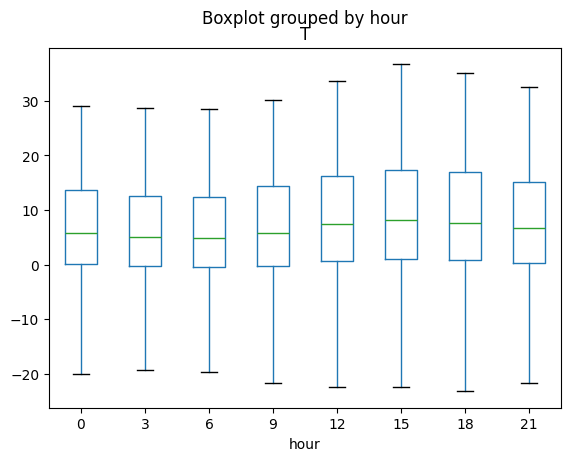

In [3]:
hour_vars = temp.to_frame()
hour_vars['hour'] = hour_vars.index.hour
hour_vars.boxplot(column='T', by='hour', grid=False, showfliers=False)

In [2]:
hour_vars = temp.to_frame()
hour_vars['hour'] = hour_vars.index.hour
hour_vars = hour_vars.groupby('hour').var()

In [4]:
hour_vars['T'] / hour_vars['T'].max()

hour
0     0.770578
3     0.727813
6     0.729499
9     0.885727
12    0.982857
15    0.999754
18    1.000000
21    0.883696
Name: T, dtype: float64

In [35]:
diffs = temp.diff().to_frame()
diffs['hour'] = diffs.index.hour
day_vars = diffs.groupby('hour').var()
day_vars

,T
hour,
0,2.208907
3,1.266934
6,1.045028
9,3.860619
12,2.920675
15,1.911814
18,1.653839
21,2.344334


In [36]:
day_vars = 1 / day_vars
day_vars

,T
hour,
0,0.452713
3,0.789307
6,0.956912
9,0.259026
12,0.342387
15,0.523064
18,0.604654
21,0.426560


In [37]:
day_vars = day_vars * 8 / day_vars.sum()
day_vars

,T
hour,
0,0.831691
3,1.450059
6,1.757970
9,0.475864
12,0.629008
15,0.960935
18,1.110826
21,0.783646


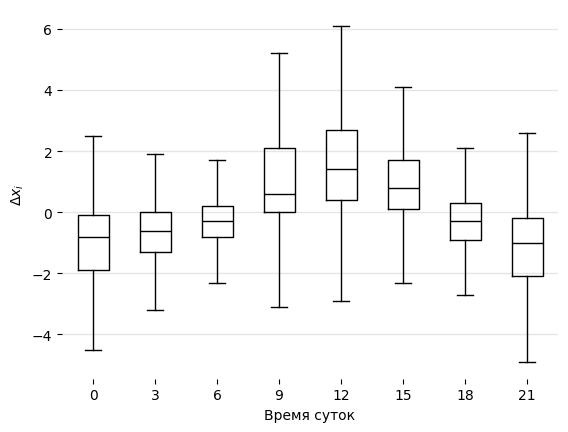

In [46]:
import matplotlib.pyplot as plt

diffs = temp.diff()[1:].to_frame()
diffs['hour'] = diffs.index.hour

plt.box(False)
for h in [-4, -2, 0, 2, 4, 6]:
    plt.axhline(y=h, color='black', alpha=0.1, lw=1)

arrays = [diffs[diffs['hour'] == i]['T'].values for i in [0,3,6,9,12,15,18,21]]
plt.boxplot(arrays, 
            showfliers=False, 
            medianprops={"color":"black"})
plt.xticks(list(range(1,9)),[0,3,6,9,12,15,18,21])
plt.xlabel("Время суток")
plt.ylabel("$\\Delta x_i$")
plt.show()

# diffs.boxplot(column='T', by='hour', grid=False, showfliers=False)

In [47]:
diffs = temp.diff()[1:].to_frame()
diffs['hour'] = diffs.index.hour

diffs = pd.merge(diffs, day_vars, how='left', on='hour')
diffs['T'] = diffs['T_x'] * np.sqrt(diffs['T_y']) 
diffs

,T_x,hour,T_y,T
0,-1.6,3,1.450059,-1.926694
1,-0.9,6,1.757970,-1.193296
2,-0.6,9,0.475864,-0.413897
3,1.7,12,0.629008,1.348271
4,2.3,15,0.960935,2.254628
...,...,...,...,...
55418,0.5,9,0.475864,0.344914
55419,0.6,12,0.629008,0.475860
55420,0.4,15,0.960935,0.392109
55421,-2.3,18,1.110826,-2.424102


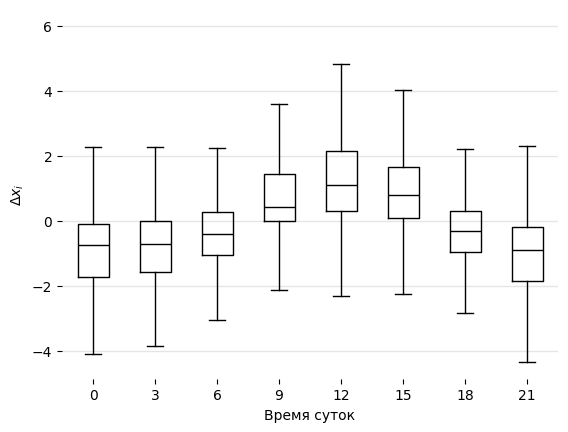

In [48]:
import matplotlib.pyplot as plt

plt.box(False)
for h in [-4, -2, 0, 2, 4, 6]:
    plt.axhline(y=h, color='black', alpha=0.1, lw=1)

arrays = [diffs[diffs['hour'] == i]['T'].values for i in [0,3,6,9,12,15,18,21]]
plt.boxplot(arrays, 
            showfliers=False, 
            medianprops={"color":"black"})
plt.xticks(list(range(1,9)),[0,3,6,9,12,15,18,21])
plt.xlabel("Время суток")
plt.ylabel("$\\Delta x_i$")
plt.show()